# Aprenentatge Computacional

# Caso Kaggle

In [1]:
#per treure warnings
from warnings import simplefilter 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings('always', category = DeprecationWarning)

# data analysis and wrangling
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
np.seterr(all="ignore")
import random as rnd
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import svm, datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
import math
import numpy as np #importem la llibreria
from sklearn.linear_model import LinearRegression
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px

#Importamos los paquetes para balanceo
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, NearMiss


np.warnings.filterwarnings('ignore')

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(X,y,col,C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    # Take the first two features. We could avoid this by using a two-dim dataset
    X=X
    y=y
    col=col

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(col[0])
        ax.set_ylabel(col[1])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
    
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val


def compute_precision_recall(probs):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower left")

        
def compute_ROC(probs):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()
    
def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)


def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr


def visualize_confusion_matrix(y_pred, y_real):
    # mostra la matriu de confusió
    cm = confusion_matrix(y_real, y_pred)
    plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

def  calculate_f1(cm):
    precision = cm[1][1]/(cm[0][1] + cm[1][1])
    recall = cm[1][1]/(cm[1][0] + cm[1][1])
    f1 = 2*(precision*recall)/(precision+recall)
    return f1

In [3]:
def apply_models(particions,X,y,ret=False):

    for part in particions:
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)

        #Creem el regresor logístic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
        # l'entrenem
        logireg.fit(x_t, y_t)
        problr = logireg.predict_proba(x_v)
        print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))

        #Creem random forests gini
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        # l'entrenem 
        clf.fit(x_t, y_t)
        probclf = clf.predict_proba(x_v)
        print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))

        
        #Creem random forests entropy with n_e=100 and md=5
        clfe = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,criterion="entropy")
        # l'entrenem 
        clfe.fit(x_t, y_t)
        probclfe = clfe.predict_proba(x_v)
        print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))  

        print("\n")
    if ret:
        return [problr,probclf,probclfe],x_t, x_v, y_t, y_v

Nuestra base de datos está dividida en dos grupos, el conjunto de entrenamiento (train.csv) y el
conjunto de pruebas (test.csv).

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
print(train.columns.values)

['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage' 'Response']


In [6]:
# preview the data
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Nuestro atributo objetivo será "Response"

Para poder visualizar mejor los datos del dataset se han hecho los siguientes gráficos:

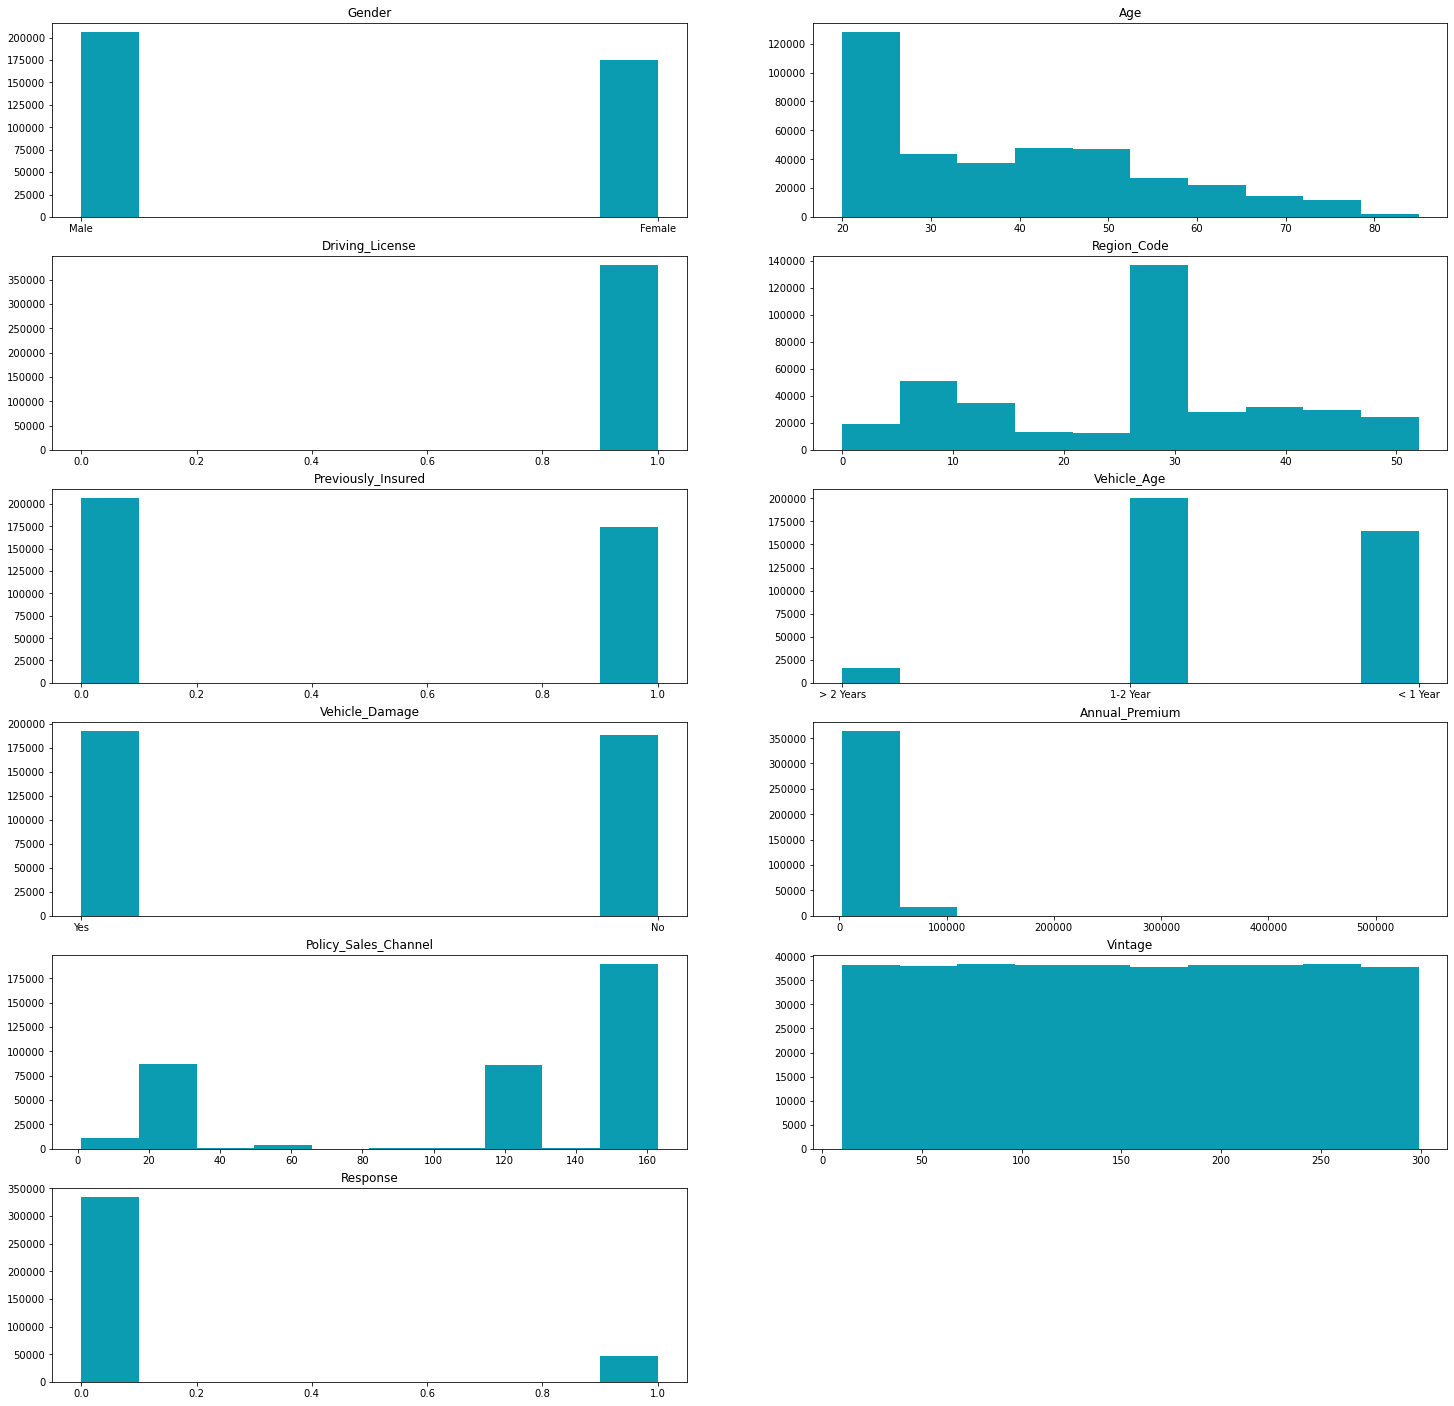

In [8]:
columns = [ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']
fig = plt.figure(figsize=(25, 25))
i = 0
for col in columns:
    i+= 1
    fig.add_subplot(6,2,i)
    plt.hist(train[col], color=(12/255,156/255,178/255))
    plt.title(col)
plt.show()

Vemos que ningun atrubiuto sigue una distrinución normal

In [9]:
train['Gender'] = train['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

In [10]:
train['Vehicle_Age'] = train['Vehicle_Age'].map( {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0} ).astype(int)

In [11]:
le = LabelEncoder()
transformed_veh_dam = le.fit_transform(train["Vehicle_Damage"])
train["Vehicle_Damage"] = transformed_veh_dam

In [12]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


Quitamos la variable inncesaria 'id'

In [13]:
train.drop(['id'],axis=1,inplace=True)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [14]:
d=train.describe()
d

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.459239,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Como el atributo "Driving_License" un 99% de las veces es 1, lo podemos quitar

In [15]:
train.drop(['Driving_License'],axis=1,inplace=True)
train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0


Visualitzamos la matriz de correlación

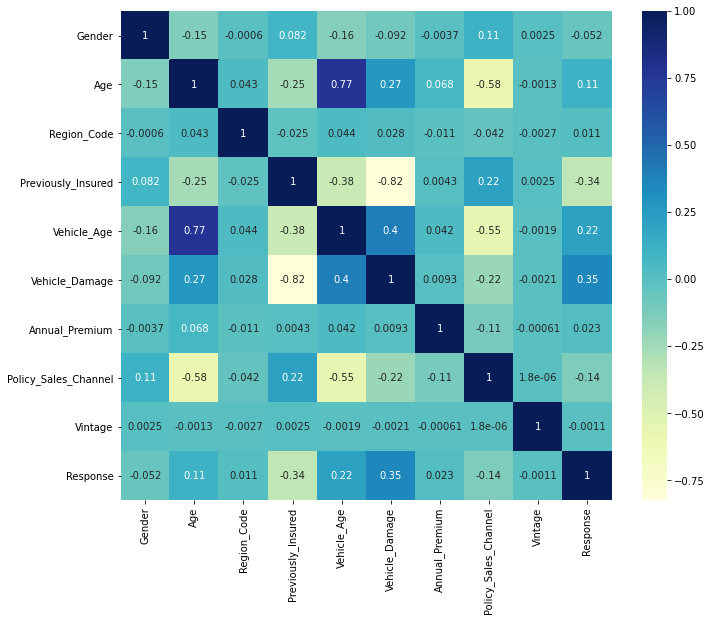

In [16]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
sns.heatmap(corr,annot=True, cmap="YlGnBu")
plt.show()

También podemos ver que no hay una gran correlación entre estos atributos y el género, tal y
como podemos ver en la siguiente gráfica:

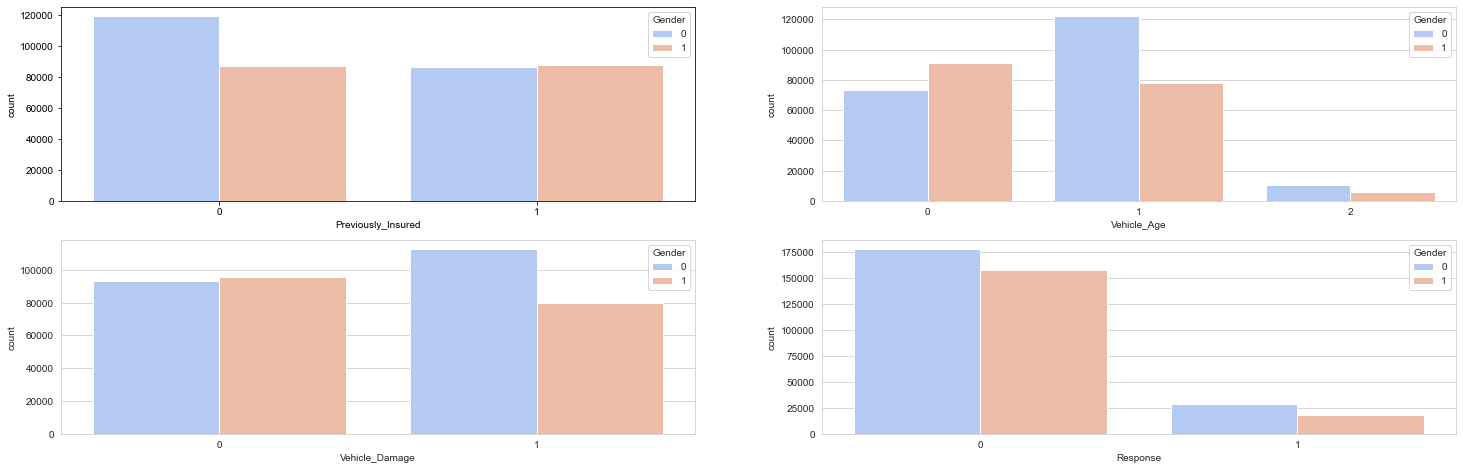

In [17]:
columns = [ 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
fig = plt.figure(figsize=(25, 25))
i = 0
for col in columns:
    i+= 1
    fig.add_subplot(6,2,i)
    sns.set_style('whitegrid')
    sns.countplot(x=col,hue='Gender',data=train,palette='coolwarm')
plt.show()

In [18]:
train_v = train.values
x = train_v[:, [0,1,2,3,4,5,6,7,8]]
y = train_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (381109, 9)
Dimensionalitat de l'atribut Y (381109,)


### PCA

Para visualizar como están distribuidos los datos podemos aplicar una PCA y observar cómo se distribuye el atributo “Response”.

In [19]:
dataset_x = train.drop(columns='Response')
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [20]:
df = pd.DataFrame(reduced, columns = ['pc1','pc2'])
df['Response']=train['Response']
df

,pc1,pc2,Response
0,0.967277,-0.419363,1
1,0.257877,-0.568358,0
2,0.974870,-0.424461,1
3,-0.774687,-0.526856,0
4,-0.907332,0.422503,0
...,...,...,...
381104,-0.396164,-0.728943,0
381105,-0.746981,-0.539188,0
381106,-0.778286,-0.521522,0
381107,0.747367,0.574973,0


Primero hacemos una PCA para dejar solamente dos atributos y el “Response”. Con lo cual obtenemos la siguiente matriz de correlación:


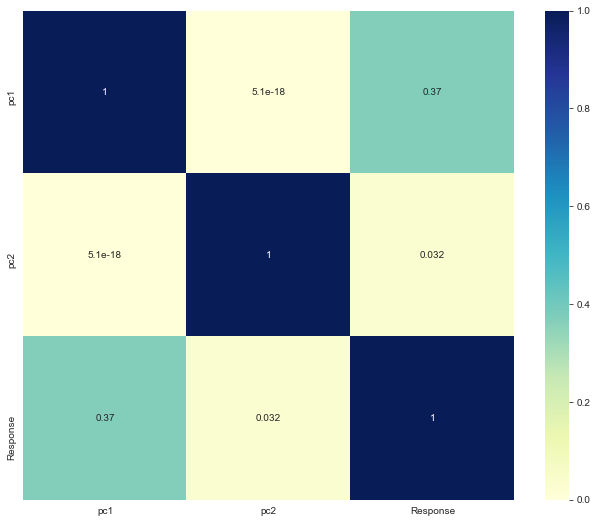

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
sns.heatmap(corr,annot=True, cmap="YlGnBu")
plt.show()

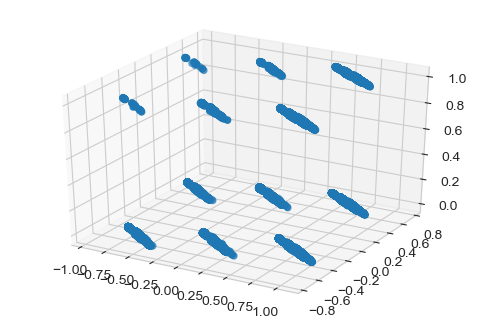

In [22]:
x_train, y_train, x_val, y_val = split_data(x, y)
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])
plt3d = plt.figure('Grafic 3D del millor component de la PCA i el Response', dpi=100.0).gca(projection='3d')
plt3d.scatter(df['pc1'],df['pc2'],df['Response'])

Y mostrando estos datos en un plano obtenemos:

In [24]:
fig = px.scatter(df, x="pc1", y="pc2", color="Response", opacity = 0.1)
fig.show()

Donde podemos ver que las muestras con “Response” = 1 (puntos amarillos), están a partir de pc1 > 0,4 aproximadamente, aunque vemos también que están bastante juntos a las muestras con “Response” = 0 (puntos azules).


### 3. Estudio y selección de modelos

In [25]:
# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))
    print("")

Error en atribut 0: 0.106223
R2 score en atribut 0: 0.001946

Error en atribut 1: 0.105130
R2 score en atribut 1: 0.012214

Error en atribut 2: 0.106416
R2 score en atribut 2: 0.000131

Error en atribut 3: 0.094290
R2 score en atribut 3: 0.114062

Error en atribut 4: 0.101271
R2 score en atribut 4: 0.048473

Error en atribut 5: 0.093222
R2 score en atribut 5: 0.124104

Error en atribut 6: 0.106369
R2 score en atribut 6: 0.000577

Error en atribut 7: 0.104372
R2 score en atribut 7: 0.019333

Error en atribut 8: 0.106433
R2 score en atribut 8: -0.000029



In [26]:
y = train.filter(['Response'])
X =train.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Para escoger el modelo que más se ajusta a nuestro dataset, hemos considerado probar los siguientes modelos:

· Regresor logístico

· Random forests (gini)

· Random forests (entropy con n_e=100 y md=5)

Los modelos como SVM o KNN no los tenemos en cuenta debido al tamaño de nuestro dataset.

Una vez ejecutados los modelos obtenemos los siguientes datos:

In [27]:
particions = [0.5, 0.7, 0.8]
probs_list,x_t, x_v, y_t, y_v=apply_models(particions,X,y,ret=True)

Correct classification Logistic         0.5 % of the data:  0.8771955603369106
Correct classification RFC              0.5 % of the data:  0.8773320038833933
Correct classification RFC etpy         0.5 % of the data:  0.8773320038833933


Correct classification Logistic         0.7 % of the data:  0.8781891492395022
Correct classification RFC              0.7 % of the data:  0.8783553304820131
Correct classification RFC etpy         0.7 % of the data:  0.8783553304820131


Correct classification Logistic         0.8 % of the data:  0.8771089711631812
Correct classification RFC              0.8 % of the data:  0.8773582430269476
Correct classification RFC etpy         0.8 % of the data:  0.8773582430269476




problr
probclf
probclfe


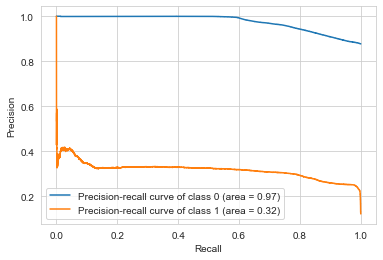

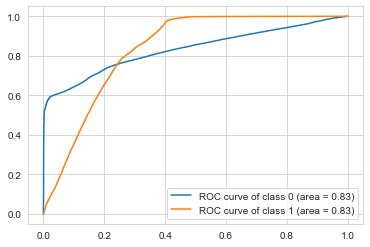

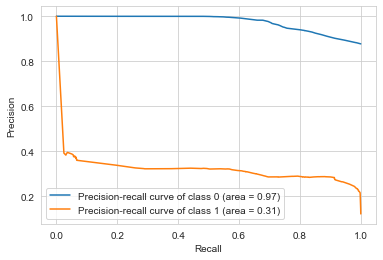

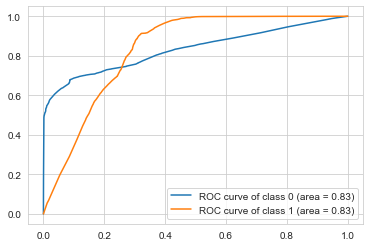

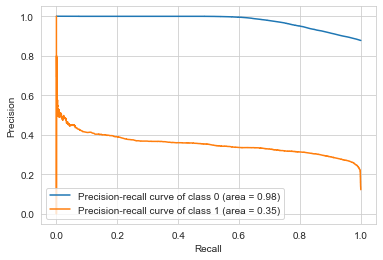

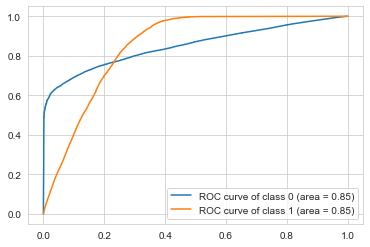

In [28]:
n_classes = 2
probs_names=["problr","probclf","probclfe"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])

In [29]:
particions = [0.5, 0.7, 0.8]

Correct classification Logistic Regression           0.5 % of the data:  0.8770381254755845
Correct classification Logistic Regression           0.7 % of the data:  0.8779879824722521
Correct classification Logistic Regression           0.8 % of the data:  0.876125003279893
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  0.0037982696771470775


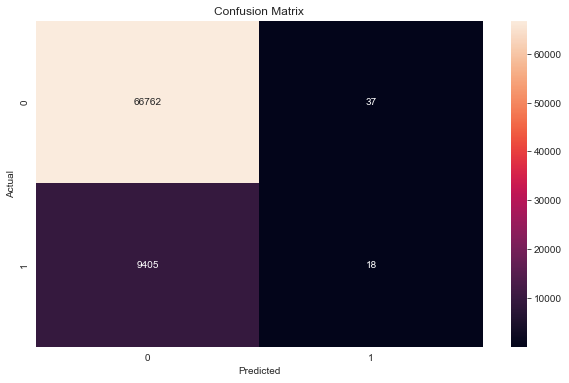

In [30]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)

Correct classification RFC           0.5 % of the data:  0.8776993518931542
Correct classification RFC           0.7 % of the data:  0.8776906055119694
Correct classification RFC           0.8 % of the data:  0.8783815696255675
------------------------------------------
F1-score for RFC                     0.8 % of the data:  nan


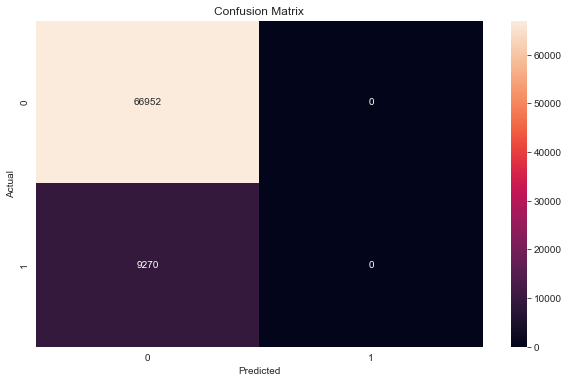

In [32]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.8780771955603369
Correct classification RFC etpy           0.7 % of the data:  0.877139583497328
Correct classification RFC etpy           0.8 % of the data:  0.8774238408858335
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  nan


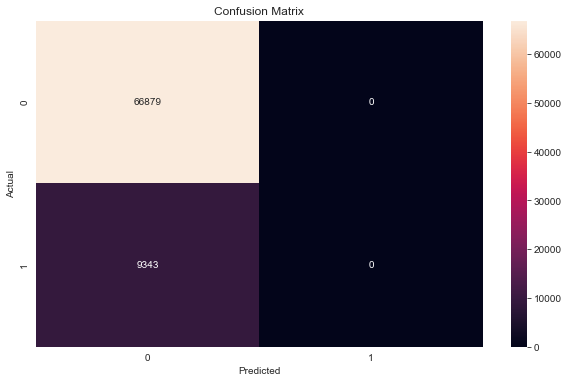

In [33]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clfe = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,criterion="entropy") 
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

Podemos ver que con los tres modelos son aparecen unos resultados bastante parecidos y todos ellos con un accuracy bastante alto.

Vemos que los tres métodos ponen todas las predicciones (o casi todas) a 0, esto es debido a que en la mayoría de nuestros datos el resultado es 0, por lo tanto, procederemos a utilizar algunas técnicas con el fin de balancear los datos.

### Undersampling + Oversampling

In [34]:
#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek()#random_state = 0

In [35]:
train_us = train
target = pd.DataFrame(train_us['Response'])
#Smote-Tomek. Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
trainsmoteT, targetsmoteT = smoteT.fit_resample(train_us,target)
Response1smoteT = targetsmoteT.sum()
Response0smoteT = targetsmoteT.shape[0]- Response1smoteT
print('Response = 1: ', Response1smoteT, ' , Response = 0: ', Response0smoteT )
smoteT

Response = 1:  Response    326929
dtype: int64  , Response = 0:  Response    326929
dtype: int64


SMOTETomek()

In [36]:
trainsmoteT_v = trainsmoteT.values
x = trainsmoteT_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainsmoteT_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (653858, 9)
Dimensionalitat de l'atribut Y (653858,)


In [37]:
x_train, y_train, x_val, y_val = split_data(x, y)

In [38]:
y = trainsmoteT.filter(['Response'])
X =trainsmoteT.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [39]:
particions = [0.5, 0.7, 0.8]

Correct classification Logistic Regression           0.5 % of the data:  0.7739570365431027
Correct classification Logistic Regression           0.7 % of the data:  0.7744726190112052
Correct classification Logistic Regression           0.8 % of the data:  0.7767335515247913
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  0.7981108982913725


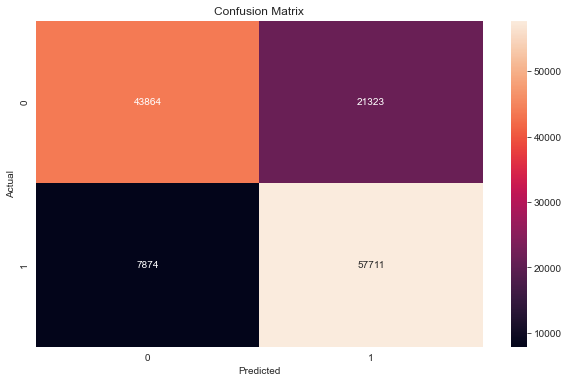

In [40]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)

Correct classification RFC           0.5 % of the data:  0.7962860437587366
Correct classification RFC           0.7 % of the data:  0.7980556490176286
Correct classification RFC           0.8 % of the data:  0.7986801455969168
------------------------------------------
F1-score for RFC                     0.8 % of the data:  0.8249592766197933


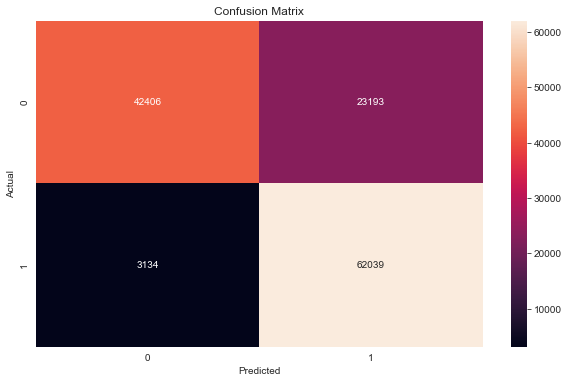

In [41]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.8198171468422807
Correct classification RFC etpy           0.7 % of the data:  0.8218884776557673
Correct classification RFC etpy           0.8 % of the data:  0.8208408527819411
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  0.8402615377272944


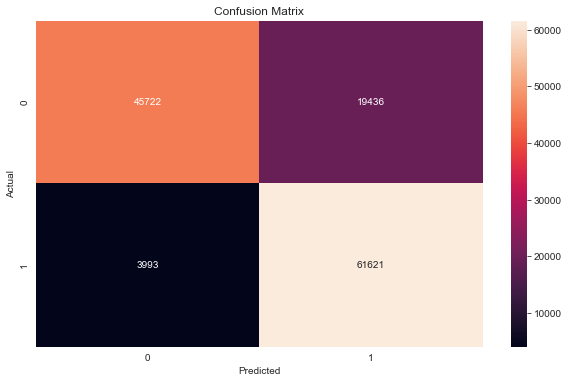

In [42]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clfe = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0,criterion="entropy") 
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

Vemos como en general la accuracy ha bajado un poco, pero que el “F1-score” ahora es mucho más alto que en los casos que teníamos los datos desbalanceados.

### Undersampling

También podemos probar de hacer únicamente “undersampling”, para este caso tendremos en cuenta dos tipos de undersampling que son: RandomUnderSampler y NearMiss.

RandomUnderSampler elimina muestras de la clase más representada aleatoriamente, mientras que NearMiss elimina las muestras de la clase más representada que estén más cerca de la clase menos separada para tener una mayor diferencia entre clases.

Con estos dos métodos pasaremos de tener 381109 muestras a únicamente 93420.

In [43]:
rus = RandomUnderSampler()
nm = NearMiss()

#### RandomUnderSampler

In [45]:
#RUS. Elimina muestras de la clase más representada aleatoriamente
trainRus, targetRus = rus.fit_resample(train_us,target)
Response1Rus = targetRus.sum()
Response0Rus = targetRus.shape[0]- Response1Rus
print('Response = 1: ', Response1Rus, ' , Response = 0: ', Response0Rus )
trainRus

Response = 1:  Response    46710
dtype: int64  , Response = 0:  Response    46710
dtype: int64


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,29,8.0,1,0,0,39405.0,152.0,171,0
1,0,25,12.0,0,0,1,38561.0,152.0,143,0
2,0,32,20.0,0,1,1,2630.0,157.0,289,0
3,0,36,12.0,0,0,0,2630.0,1.0,228,0
4,1,45,28.0,0,1,1,21420.0,124.0,60,0
...,...,...,...,...,...,...,...,...,...,...
93415,0,40,46.0,0,1,1,27508.0,26.0,189,1
93416,1,41,28.0,0,1,1,37377.0,124.0,99,1
93417,1,46,28.0,0,1,1,34741.0,124.0,167,1
93418,1,61,28.0,0,1,1,43875.0,26.0,139,1


In [46]:
trainRus[trainRus.index.isin(rus.sample_indices_)]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,29,8.0,1,0,0,39405.0,152.0,171,0
2,0,32,20.0,0,1,1,2630.0,157.0,289,0
3,0,36,12.0,0,0,0,2630.0,1.0,228,0
7,0,46,4.0,0,1,1,2630.0,124.0,36,0
9,1,47,28.0,0,1,1,35193.0,124.0,113,0
...,...,...,...,...,...,...,...,...,...,...
93398,0,44,8.0,0,1,1,24251.0,124.0,94,1
93403,0,23,32.0,0,0,1,25567.0,152.0,284,1
93408,0,52,28.0,0,2,1,52740.0,124.0,271,1
93414,1,49,28.0,0,2,1,33891.0,4.0,98,1


In [47]:
trainRus_v = trainRus.values
x = trainRus_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRus_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (93420, 9)
Dimensionalitat de l'atribut Y (93420,)


In [48]:
x_train, y_train, x_val, y_val = split_data(x, y)

In [49]:
y = trainRus.filter(['Response'])
X =trainRus.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification Logistic Regression           0.5 % of the data:  0.7813958467137658
Correct classification Logistic Regression           0.7 % of the data:  0.7792129018446498
Correct classification Logistic Regression           0.8 % of the data:  0.785806037251124
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  0.8210356855379662


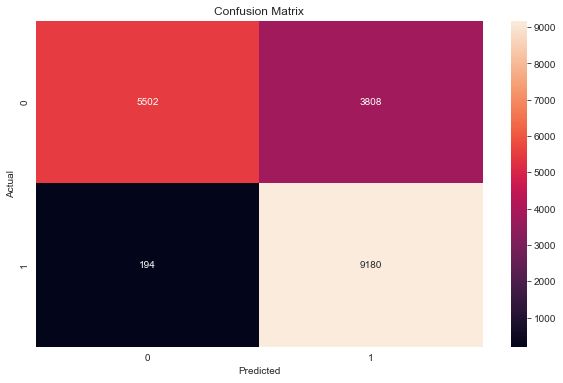

In [50]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)
        

Correct classification RFC           0.5 % of the data:  0.7909869406979233
Correct classification RFC           0.7 % of the data:  0.7805330574089271
Correct classification RFC           0.8 % of the data:  0.7924427317490901
------------------------------------------
F1-score for RFC                     0.8 % of the data:  0.820462962962963


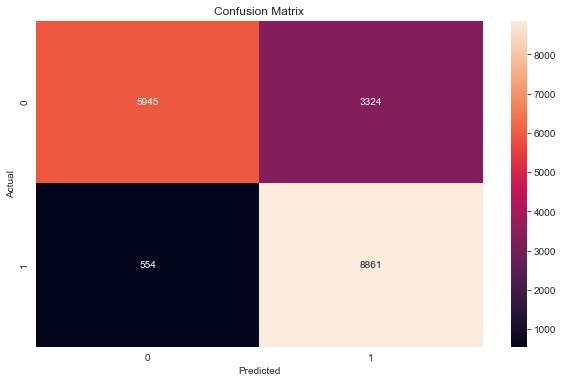

In [51]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.7897452365660458
Correct classification RFC etpy           0.7 % of the data:  0.789345987797481
Correct classification RFC etpy           0.8 % of the data:  0.7915328623421108
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  0.8143735404851546


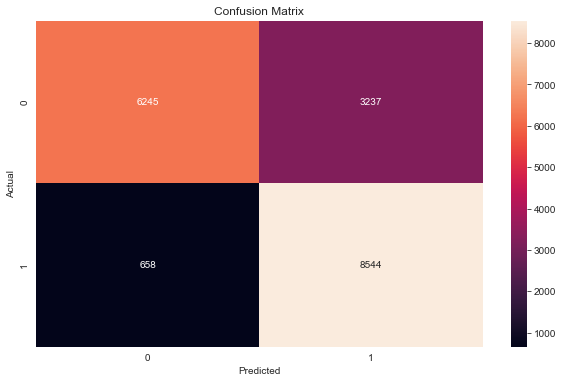

In [52]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clfe = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,criterion="entropy") 
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

Vemos que en este caso los resultados son muy parecidos a los anteriores, pero tenemos que mirar si nuestro modelo consigue clasificar bien los datos que hemos eliminado.

Miramos los datos que hemos eliminado con RandomUnderSampling

In [53]:
train

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,0,74,26.0,1,1,0,30170.0,26.0,88,0
381105,0,30,37.0,1,0,0,40016.0,152.0,131,0
381106,0,21,30.0,1,0,0,35118.0,160.0,161,0
381107,1,68,14.0,0,2,1,44617.0,124.0,74,0


In [54]:
trainRest = trainRus
trainRest

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,29,8.0,1,0,0,39405.0,152.0,171,0
1,0,25,12.0,0,0,1,38561.0,152.0,143,0
2,0,32,20.0,0,1,1,2630.0,157.0,289,0
3,0,36,12.0,0,0,0,2630.0,1.0,228,0
4,1,45,28.0,0,1,1,21420.0,124.0,60,0
...,...,...,...,...,...,...,...,...,...,...
93415,0,40,46.0,0,1,1,27508.0,26.0,189,1
93416,1,41,28.0,0,1,1,37377.0,124.0,99,1
93417,1,46,28.0,0,1,1,34741.0,124.0,167,1
93418,1,61,28.0,0,1,1,43875.0,26.0,139,1


In [55]:
pd.DataFrame(trainRest)

rus.sample_indices_

array([ 75682,  28197,  69617, ..., 381073, 381075, 381097], dtype=int64)

In [56]:
train[train.index.isin(rus.sample_indices_)]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
7,1,56,28.0,0,1,1,32031.0,26.0,72,1
9,1,32,6.0,1,0,0,28771.0,152.0,80,0
...,...,...,...,...,...,...,...,...,...,...
381097,1,38,28.0,0,1,1,52742.0,26.0,165,1
381099,1,51,28.0,0,1,1,44504.0,26.0,71,0
381102,1,25,41.0,1,0,1,2630.0,152.0,102,0
381105,0,30,37.0,1,0,0,40016.0,152.0,131,0


In [57]:
trainRest_cont=train[~train.index.isin(rus.sample_indices_)]
trainRest_cont

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0
5,1,24,33.0,0,0,1,2630.0,160.0,176,0
6,0,23,11.0,0,0,1,23367.0,152.0,249,0
8,1,24,3.0,1,0,0,27619.0,152.0,28,0
...,...,...,...,...,...,...,...,...,...,...
381101,1,70,28.0,0,2,1,50904.0,122.0,215,0
381103,0,47,50.0,0,1,1,39831.0,26.0,235,0
381104,0,74,26.0,1,1,0,30170.0,26.0,88,0
381106,0,21,30.0,1,0,0,35118.0,160.0,161,0


In [58]:
trainRest_v = trainRest_cont.values
x = trainRest_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRest_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (287689, 9)
Dimensionalitat de l'atribut Y (287689,)


In [59]:
y = trainRest_cont.filter(['Response'])
X = trainRest_cont.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification Logistic Regression           0.5 % of the data:  0.5430150509228684
Correct classification Logistic Regression           0.7 % of the data:  0.5457378891631038
Correct classification Logistic Regression           0.8 % of the data:  0.5459174806215024
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  nan


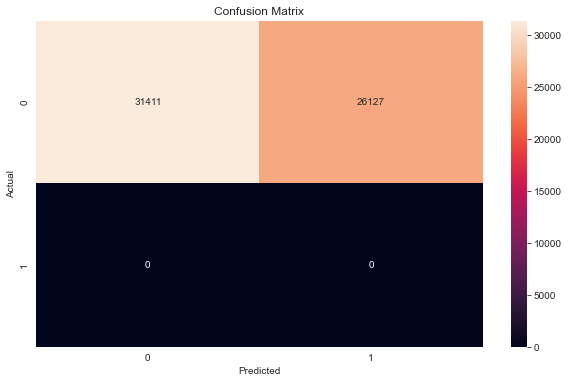

In [60]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    #logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)
        

Correct classification RFC           0.5 % of the data:  0.5913657061420279
Correct classification RFC           0.7 % of the data:  0.5932311400002317
Correct classification RFC           0.8 % of the data:  0.5925822934408564
------------------------------------------
F1-score for RFC                     0.8 % of the data:  nan


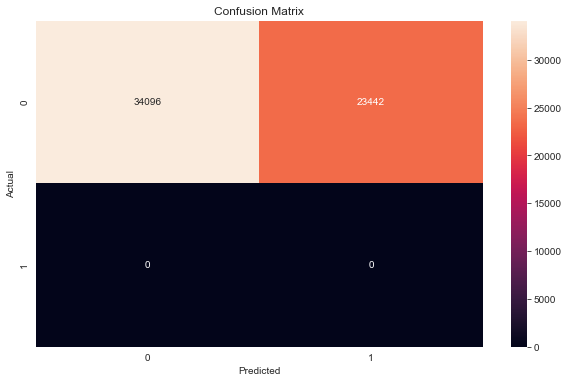

In [61]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clf = RandomForestClassifier(max_depth=2, random_state=0)
    #clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.5914838889081998
Correct classification RFC etpy           0.7 % of the data:  0.5905894075799182
Correct classification RFC etpy           0.8 % of the data:  0.5936772220098022
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  nan


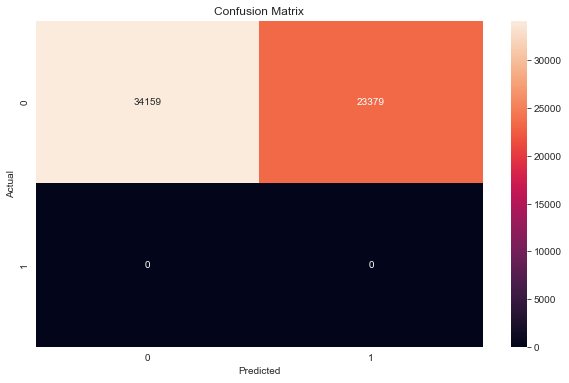

In [62]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clfe = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0,criterion="entropy") 
    #clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

#### NearMiss

In [63]:
train_us = train
target = pd.DataFrame(train_us['Response'])
#NearMiss. Elimina las muestras más cercanas de la clase más representada
trainNm, targetNm = nm.fit_resample(train_us,target)
Response1Nm = targetNm.sum()
Response0Nm = targetNm.shape[0]- Response1Nm
print('Response = 1: ', Response1Nm, ' , Response = 0: ', Response0Nm )
trainNm

Response = 1:  Response    46710
dtype: int64  , Response = 0:  Response    46710
dtype: int64


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,42,28.0,0,1,1,2630.0,26.0,77,0
1,0,46,28.0,0,1,1,2630.0,26.0,294,0
2,0,46,28.0,0,1,1,2630.0,26.0,20,0
3,1,47,48.0,0,1,1,2630.0,124.0,154,0
4,1,35,28.0,0,1,1,2630.0,156.0,249,0
...,...,...,...,...,...,...,...,...,...,...
93415,0,40,46.0,0,1,1,27508.0,26.0,189,1
93416,1,41,28.0,0,1,1,37377.0,124.0,99,1
93417,1,46,28.0,0,1,1,34741.0,124.0,167,1
93418,1,61,28.0,0,1,1,43875.0,26.0,139,1


In [64]:
trainNm[trainNm.index.isin(nm.sample_indices_)]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,42,28.0,0,1,1,2630.0,26.0,77,0
2,0,46,28.0,0,1,1,2630.0,26.0,20,0
5,0,50,29.0,0,1,1,2630.0,124.0,40,0
7,1,45,28.0,0,1,1,2630.0,26.0,89,0
10,1,42,28.0,0,1,1,2630.0,124.0,216,0
...,...,...,...,...,...,...,...,...,...,...
93403,0,23,32.0,0,0,1,25567.0,152.0,284,1
93411,1,34,41.0,0,1,1,2630.0,124.0,208,1
93413,1,36,28.0,0,1,1,53840.0,152.0,242,1
93414,1,49,28.0,0,2,1,33891.0,4.0,98,1


In [65]:
trainNm_v = trainNm.values
x = trainNm_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainNm_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (93420, 9)
Dimensionalitat de l'atribut Y (93420,)


In [66]:
y = trainNm.filter(['Response'])
X =trainNm.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification Logistic Regression           0.5 % of the data:  0.9090130593020767
Correct classification Logistic Regression           0.7 % of the data:  0.910800299710993
Correct classification Logistic Regression           0.8 % of the data:  0.9085313637336758
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  0.8986298119698678


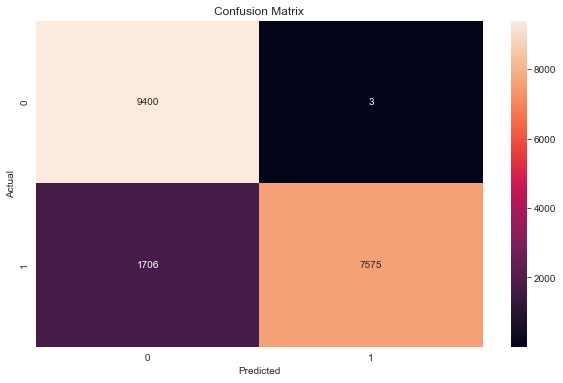

In [67]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)
        

Correct classification RFC           0.5 % of the data:  0.9077713551701991
Correct classification RFC           0.7 % of the data:  0.9090876654654441
Correct classification RFC           0.8 % of the data:  0.9040890601584243
------------------------------------------
F1-score for RFC                     0.8 % of the data:  0.8936372269705603


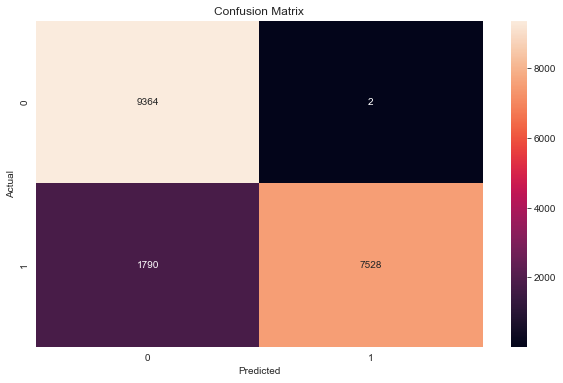

In [68]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.9090130593020767
Correct classification RFC etpy           0.7 % of the data:  0.9090519855853284
Correct classification RFC etpy           0.8 % of the data:  0.9068721901091843
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  0.8975747586531669


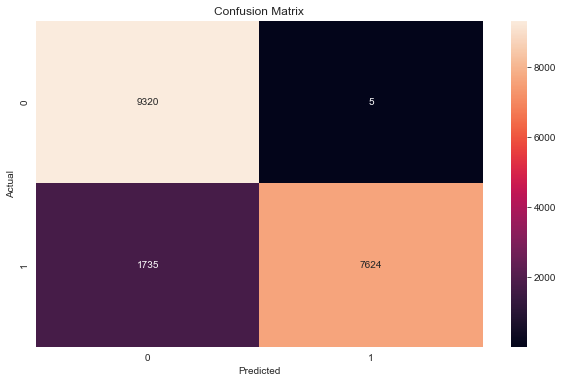

In [69]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clfe = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,criterion="entropy") 
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

Vemos que en este caso una mejoría en los resultados respecto a los anteriores, pero igualmente tenemos que mirar si nuestro modelo consigue clasificar bien los datos que hemos eliminado.

Miramos los datos que hemos eliminado con NearMiss

In [70]:
train

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,0,74,26.0,1,1,0,30170.0,26.0,88,0
381105,0,30,37.0,1,0,0,40016.0,152.0,131,0
381106,0,21,30.0,1,0,0,35118.0,160.0,161,0
381107,1,68,14.0,0,2,1,44617.0,124.0,74,0


In [71]:
trainRest = trainNm
trainRest

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,42,28.0,0,1,1,2630.0,26.0,77,0
1,0,46,28.0,0,1,1,2630.0,26.0,294,0
2,0,46,28.0,0,1,1,2630.0,26.0,20,0
3,1,47,48.0,0,1,1,2630.0,124.0,154,0
4,1,35,28.0,0,1,1,2630.0,156.0,249,0
...,...,...,...,...,...,...,...,...,...,...
93415,0,40,46.0,0,1,1,27508.0,26.0,189,1
93416,1,41,28.0,0,1,1,37377.0,124.0,99,1
93417,1,46,28.0,0,1,1,34741.0,124.0,167,1
93418,1,61,28.0,0,1,1,43875.0,26.0,139,1


In [72]:
pd.DataFrame(trainRest)

nm.sample_indices_

array([105709, 352540,  54010, ..., 381073, 381075, 381097], dtype=int64)

In [73]:
train[train.index.isin(nm.sample_indices_)]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
5,1,24,33.0,0,0,1,2630.0,160.0,176,0
7,1,56,28.0,0,1,1,32031.0,26.0,72,1
10,1,47,35.0,0,1,1,47576.0,124.0,46,1
...,...,...,...,...,...,...,...,...,...,...
381086,1,34,35.0,0,1,1,2630.0,152.0,208,0
381092,0,38,28.0,1,1,0,2630.0,124.0,130,0
381094,1,47,20.0,0,1,1,2630.0,26.0,84,0
381097,1,38,28.0,0,1,1,52742.0,26.0,165,1


In [74]:
trainRest_cont=train[~train.index.isin(nm.sample_indices_)]
trainRest_cont

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0
6,0,23,11.0,0,0,1,23367.0,152.0,249,0
8,1,24,3.0,1,0,0,27619.0,152.0,28,0
...,...,...,...,...,...,...,...,...,...,...
381104,0,74,26.0,1,1,0,30170.0,26.0,88,0
381105,0,30,37.0,1,0,0,40016.0,152.0,131,0
381106,0,21,30.0,1,0,0,35118.0,160.0,161,0
381107,1,68,14.0,0,2,1,44617.0,124.0,74,0


In [75]:
sum(trainRest_cont["Response"])

0

In [76]:
trainRest_v = trainRest_cont.values
x = trainRest_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRest_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (287689, 9)
Dimensionalitat de l'atribut Y (287689,)


In [77]:
x_train, y_train, x_val, y_val = split_data(x, y)

In [78]:
y = trainRest_cont.filter(['Response'])
X = trainRest_cont.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification Logistic Regression           0.5 % of the data:  0.35335951892662243
Correct classification Logistic Regression           0.7 % of the data:  0.35213829700951255
Correct classification Logistic Regression           0.8 % of the data:  0.3518370468212312
------------------------------------------
F1-score for Logistic Regression                     0.8 % of the data:  nan


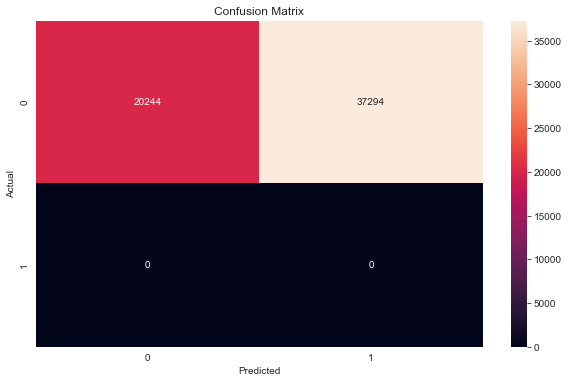

In [79]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, random_state=666)
    #logireg.fit(x_t, y_t)
    problog = logireg.predict_proba(x_v)
    print ("Correct classification Logistic Regression          ", part, "% of the data: ", logireg.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for Logistic Regression                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, logireg.predict(x_v))))
        visualize_confusion_matrix(logireg.predict(x_v), y_v)
        

Correct classification RFC           0.5 % of the data:  0.2619555771837742
Correct classification RFC           0.7 % of the data:  0.26259747181572757
Correct classification RFC           0.8 % of the data:  0.25887239737217144
------------------------------------------
F1-score for RFC                     0.8 % of the data:  nan


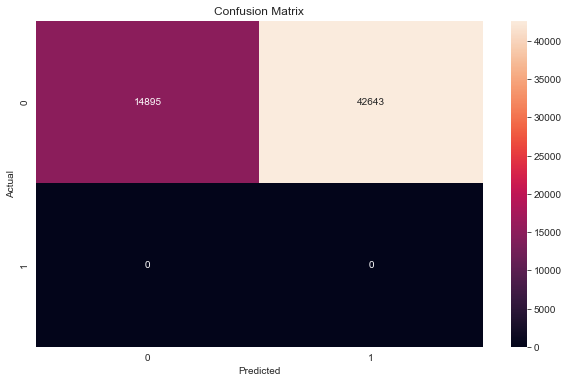

In [80]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clf = RandomForestClassifier(max_depth=2, random_state=0)
    #clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

Correct classification RFC etpy           0.5 % of the data:  0.28368035037714207
Correct classification RFC etpy           0.7 % of the data:  0.2789924339856559
Correct classification RFC etpy           0.8 % of the data:  0.2835169800827279
------------------------------------------
F1-score for RFC etpy                     0.8 % of the data:  nan


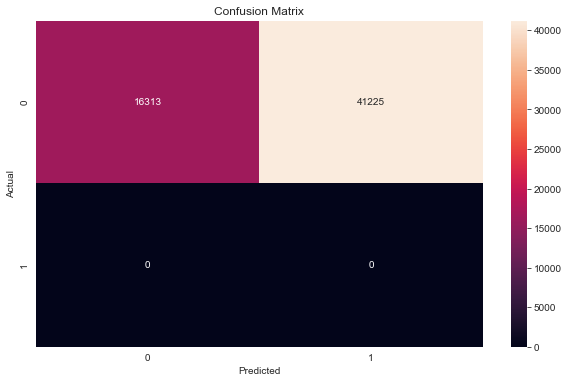

In [81]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clfe = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0,criterion="entropy") 
    #clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy          ", part, "% of the data: ", clfe.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC etpy                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clfe.predict(x_v))))
        visualize_confusion_matrix(clfe.predict(x_v), y_v)

Analizando los resultados vemos que entre los dos métodos de “undersampling” el mejor es el “RandomUnderSampler”, ya que este, aunque tenga una accuracy y f1-score más bajo, clasifica mejor los datos eliminados que “NearMiss”.

Finalmente, comparando Undersampling + Oversampling y Undersampling (RandomUnderSampler) solamente, vemos que los resultados son muy parecidos, pero por tiempo de ejecución nos quedaremos con hacer solamente Undersampling. Este menor tiempo de ejecución es debido a que trabaja con menos muestras.

# Hyperparameters

In [82]:
#RUS. Elimina muestras de la clase más representada aleatoriamente
trainRus, targetRus = rus.fit_resample(train_us,target)
Response1Rus = targetRus.sum()
Response0Rus = targetRus.shape[0]- Response1Rus
print('Response = 1: ', Response1Rus, ' , Response = 0: ', Response0Rus )
trainRus

Response = 1:  Response    46710
dtype: int64  , Response = 0:  Response    46710
dtype: int64


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,26,30.0,1,0,0,20445.0,152.0,61,0
1,0,40,28.0,0,1,1,25742.0,91.0,45,0
2,0,22,46.0,1,0,0,30332.0,152.0,125,0
3,1,24,15.0,0,0,1,32180.0,152.0,91,0
4,0,26,36.0,1,0,0,2630.0,152.0,85,0
...,...,...,...,...,...,...,...,...,...,...
93415,0,40,46.0,0,1,1,27508.0,26.0,189,1
93416,1,41,28.0,0,1,1,37377.0,124.0,99,1
93417,1,46,28.0,0,1,1,34741.0,124.0,167,1
93418,1,61,28.0,0,1,1,43875.0,26.0,139,1


In [83]:
trainRus_v = trainRus.values
x = trainRus_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRus_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de les entrades X (93420, 9)
Dimensionalitat de l'atribut Y (93420,)


In [84]:
y = trainRus.filter(['Response'])
X =trainRus.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [85]:
x_t,x_v,y_t,y_v = train_test_split(X, y, test_size=0.2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# define search space
model = LogisticRegression()
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=100)
# define search
start_time = time.time()
clf =  GridSearchCV(model, space,  n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Grid search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('accuracy:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=10000)
start_time = time.time()
search = RandomizedSearchCV(model, space, n_iter=500, n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(x_t, y_t)
# summarize result
print('Random search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('accuracy:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

Grid search
Best solver: lbfgs
Best penalty: l2
Best C: 1.7471154256882003e-05
R^2 at best_score: 0.7894990366088632
--- 832.4841041564941 seconds ---
Random search
Best solver: lbfgs
Best penalty: l2
Best C: 1.7471154256882003e-05
accuracy: 0.7894990366088632
--- 1475.7196509838104 seconds ---


In [86]:

# Number of trees in random forest
x_t,x_v,y_t,y_v = train_test_split(X, y, test_size=0.2)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1100, num = 5)]
# Number of features to consider at every split
#max_features = ['sqrt', 'log2']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# Maximum number of levels in tree
max_depth =[5] #[int(x) for x in np.linspace(0, 10, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
R_f=RandomForestClassifier()
start_time = time.time()
clf =GridSearchCV(R_f, random_grid,n_jobs=-1, cv=cv)
best_model = clf.fit(x_t,y_t)
print('Grid search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('accuracy:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1100, num = 1100)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# Maximum number of levels in tree
max_depth =[int(x) for x in np.linspace(1, 5, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(2,11))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,5))
# Method of selecting samples for training each tree
bootstrap = [True, False]
start_time = time.time()
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf =  RandomizedSearchCV(R_f, random_grid, n_iter=10, n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Random search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('accuracy:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

Grid search
Best number of estimators: 600
Best max_depth: None
Bootstrap: True
R^2 at best_score: 0.800417469492614
--- 3238.1349601745605 seconds ---
Random search
Best number of estimators: 820
Best max_depth: None
Bootstrap: True
accuracy: 0.8008991650610148
--- 495.0754978656769 seconds ---


## Grid search

In [87]:
trainRus, targetRus = rus.fit_resample(train_us,target)
Response1Rus = targetRus.sum()
Response0Rus = targetRus.shape[0]- Response1Rus
trainRus_v = trainRus.values
x = trainRus_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRus_v[:, 9]
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
y = trainRus.filter(['Response'])
X =trainRus.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Dimensionalitat de les entrades X (93420, 9)
Dimensionalitat de l'atribut Y (93420,)


Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification RFC           0.5 % of the data:  0.7811389424106188
Correct classification RFC           0.7 % of the data:  0.7814964141720484
Correct classification RFC           0.8 % of the data:  0.7768143866409762
------------------------------------------
F1-score for RFC                     0.8 % of the data:  0.7965258124329072


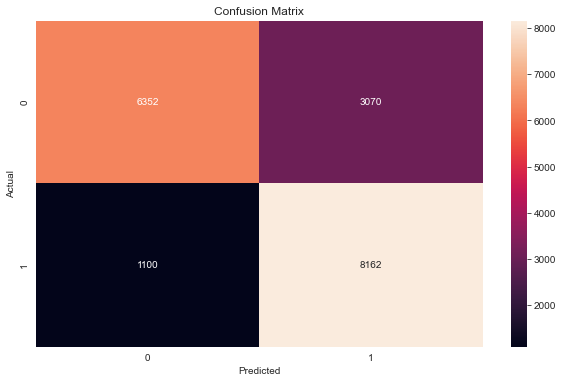

In [89]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth=None, n_estimators=600, bootstrap = True)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

In [90]:
trainRest = trainRus
pd.DataFrame(trainRest)

rus.sample_indices_
train[train.index.isin(rus.sample_indices_)]
trainRest_cont=train[~train.index.isin(rus.sample_indices_)]
trainRest_v = trainRest_cont.values
x = trainRest_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRest_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
y = trainRest_cont.filter(['Response'])
X = trainRest_cont.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Dimensionalitat de les entrades X (287689, 9)
Dimensionalitat de l'atribut Y (287689,)


Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification RFC           0.5 % of the data:  0.6427334978622823
Correct classification RFC           0.7 % of the data:  0.6460194422236899
Correct classification RFC           0.8 % of the data:  0.6425145121484932
------------------------------------------
F1-score for RFC                     0.8 % of the data:  nan


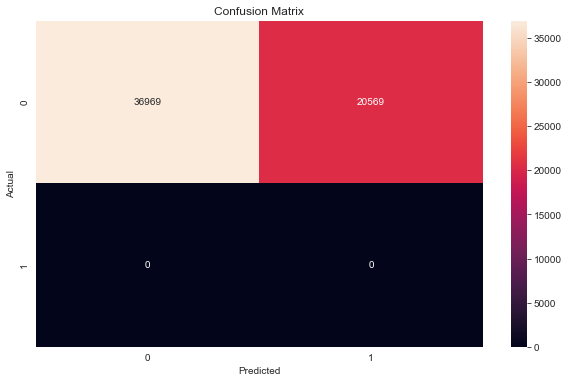

In [91]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clf = RandomForestClassifier(max_depth=None, n_estimators=600, bootstrap = True)
    #clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

## Random search

In [92]:
trainRus, targetRus = rus.fit_resample(train_us,target)
Response1Rus = targetRus.sum()
Response0Rus = targetRus.shape[0]- Response1Rus
trainRus_v = trainRus.values
x = trainRus_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRus_v[:, 9]
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
y = trainRus.filter(['Response'])
X =trainRus.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Dimensionalitat de les entrades X (93420, 9)
Dimensionalitat de l'atribut Y (93420,)


Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification RFC           0.5 % of the data:  0.7825733247698565
Correct classification RFC           0.7 % of the data:  0.7823527312948229
Correct classification RFC           0.8 % of the data:  0.7767608649111539
------------------------------------------
F1-score for RFC                     0.8 % of the data:  0.7995000721049849


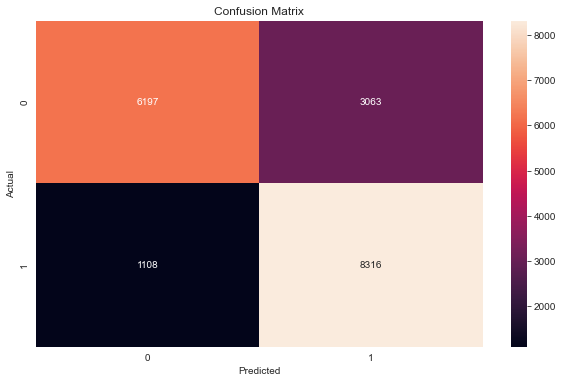

In [93]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    clf = RandomForestClassifier(max_depth= None, n_estimators=820, bootstrap = True)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)

In [94]:
trainRest = trainRus
pd.DataFrame(trainRest)

rus.sample_indices_
train[train.index.isin(rus.sample_indices_)]
trainRest_cont=train[~train.index.isin(rus.sample_indices_)]
trainRest_v = trainRest_cont.values
x = trainRest_v[:, [0,1,2,3,4,5,6,7,8]]
y = trainRest_v[:, 9]

print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
y = trainRest_cont.filter(['Response'])
X = trainRest_cont.drop(['Response'],axis=1)
X=(X-X.mean())/X.std()
X.columns

Dimensionalitat de les entrades X (287689, 9)
Dimensionalitat de l'atribut Y (287689,)


Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

Correct classification RFC           0.5 % of the data:  0.6302617400674337
Correct classification RFC           0.7 % of the data:  0.6325211164795439
Correct classification RFC           0.8 % of the data:  0.6307309951684105
------------------------------------------
F1-score for RFC                     0.8 % of the data:  nan


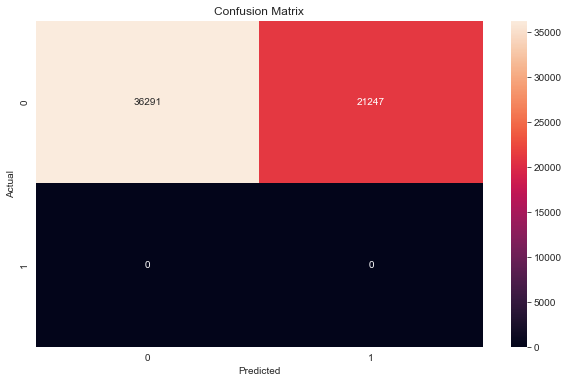

In [95]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    #clf = RandomForestClassifier(max_depth=None, n_estimators=820, bootstrap = True)
    #clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC          ", part, "% of the data: ", clf.score(x_v, y_v))
    if(part==0.8):
        print ("------------------------------------------")
        print ("F1-score for RFC                    ", part, "% of the data: ", calculate_f1(confusion_matrix(y_v, clf.predict(x_v))))
        visualize_confusion_matrix(clf.predict(x_v), y_v)